##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 8***

---
***Full names of all students in the team: Arnav Arvind, Arnav Yayavaram, Shailesh Chandra Rao, Siddharth Yayavaram, Suryansh Chandola***

---
***Id number of all students in the team: 2021A7PS2709H, 2021A7PS3117H, 2021A7PS2064H, 2021A7PS3116H, 2021A7PS0058H***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import math
import random

# **_1. Preprocessing of Dataset (Project 1)_**

In [2]:
df = pd.read_csv('Heart_Disease.csv')
df.replace('?',np.NaN,inplace = True)
# print(df.head())    # We observe that there are no column names in the dataframe
df.columns = ['hospital','age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
#adding column names for ease in interpreting data. Column names have been referred from the given data description document.
datatypes = df.dtypes
print("\n",datatypes)
df.head()


 hospital    object
age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object


,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [3]:
rows,columns = df.shape
rows,columns
# So the dataset contains 919 rows and 15 columns

(919, 15)

In [4]:
df['hospital'].value_counts()

hospital
Cleveland      302
Hungarian      294
VA             200
Switzerland    123
Name: count, dtype: int64

In [5]:
def hospital_num(x):
    if x == 'Cleveland':
        return 0
    elif x == 'Hungarian':
        return 1
    elif x == 'VA':
        return 2
    else:
        return 3 
df['hospital'] = df['hospital'].apply(hospital_num)

<Axes: xlabel='num', ylabel='Count'>

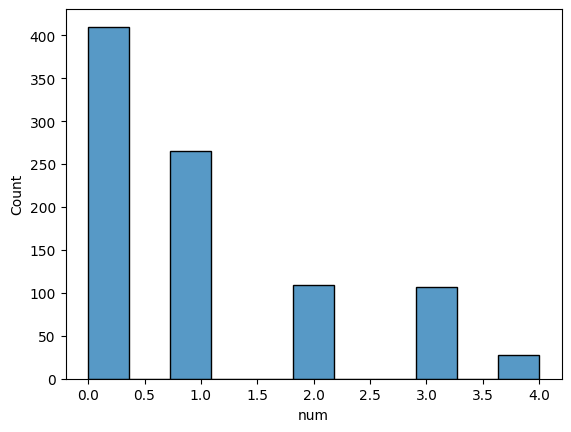

In [6]:
# df['num'].value_counts()
sns.histplot(df['num'])
# We observe that the target column has more than just 0 and 1 values unlike the given feature description.

<Axes: xlabel='num', ylabel='Count'>

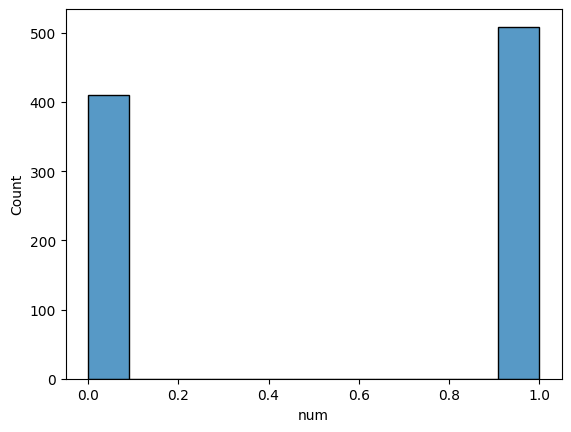

In [7]:
def non_zero_to_one(x):
    if x != 0:
        return 1
    else:
        return 0
df['num'] = df['num'].apply(non_zero_to_one)
# thus we convert all non zero values to 1 
sns.histplot(df['num'])
# We observe that after the modification the number of 0s and 1s are not equal.

**We observe that in columns: trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca and thal have NaN values in them**   

In [8]:
nan_columns = []
for column in df.columns:
    print(f"Column {column} unique values: \n{df[column].unique()}\n")
    if df[column].isnull().values.any():
        nan_columns.append(column)
nan_columns

Column hospital unique values: 
[0 1 3 2]

Column age unique values: 
[67 37 41 56 62 57 63 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]

Column sex unique values: 
[1 0]

Column cp unique values: 
[4 3 2 1]

Column trestbps unique values: 
['160' '120' '130' '140' '172' '150' '110' '132' '117' '135' '112' '105'
 '124' '125' '142' '128' '145' '170' '155' '104' '180' '138' '108' '134'
 '122' '115' '118' '100' '200' '94' '165' '102' '152' '101' '126' '174'
 '148' '178' '158' '192' '129' '144' '123' '136' '146' '106' '156' '154'
 '114' '164' '98' '190' nan '113' '92' '95' '80' '185' '116' '0' '96'
 '127']

Column chol unique values: 
['286' '229' '250' '204' '236' '268' '354' '254' '203' '192' '294' '256'
 '263' '199' '168' '239' '275' '266' '211' '283' '284' '224' '206' '219'
 '340' '226' '247' '167' '230' '335' '234' '233' '177' '276' '353' '243'
 '225' '302' '212' '330' '175' '417' '197' '198' '290' 

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

**Now we check the number of NaN values in these columns to decide what should be done with the rows containing '?'**

In [9]:
df[nan_columns].count()

trestbps    860
chol        889
fbs         829
restecg     917
thalach     864
exang       864
oldpeak     857
slope       610
ca          308
thal        433
dtype: int64

| Column | # of NaN values | Strategy |
|:------ | :-------------- | :------- |
| trestbps   |  59 | Replace with mean |
| chol       |  30 | Replace with mean |
| fbs        |  90 | Replace with mode |
| restecg    |   2 | Drop              |
| thalach    |  55 | Replace with mean |
| exang      |  55 | Replace with mode |
| oldpeak    |  62 | Replace with mean |
| slope      | 309 | Replace with mode |
| ca         | 611 | Replace with mode | 
| thal       | 486 | Replace with mode |

In [10]:
mean = ['trestbps', 'chol', 'thalach', 'oldpeak']
mode = ['fbs', 'exang', 'slope', 'ca', 'thal']
def convert_to_float(x):
    if x!= x:
        return x
    return float(x)
df.drop(df[df['restecg'].isna()].index,inplace = True)
df['restecg'] = df['restecg'].apply(convert_to_float)

In [11]:
df['fbs'] = df['fbs'].apply(convert_to_float)
df['fbs'] = df['fbs'].fillna(0)
df['fbs'].count()

917

In [12]:
# df['fbs'] = df['fbs'].apply(convert_to_float)
df['fbs'].value_counts()

fbs
0.0    780
1.0    137
Name: count, dtype: int64

In [13]:
def fill_na_with_mean(x):
    y = x.apply(convert_to_float)
    return y.fillna(y.mean())
def fill_na_with_mode(x):
    y = x.apply(convert_to_float)
    return y.fillna(y.mode()[0])

858
917


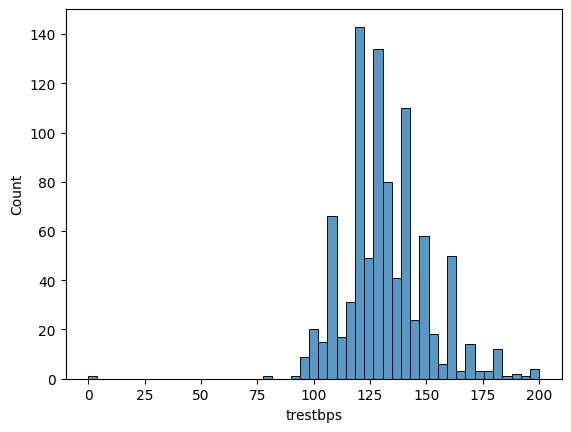

887
917


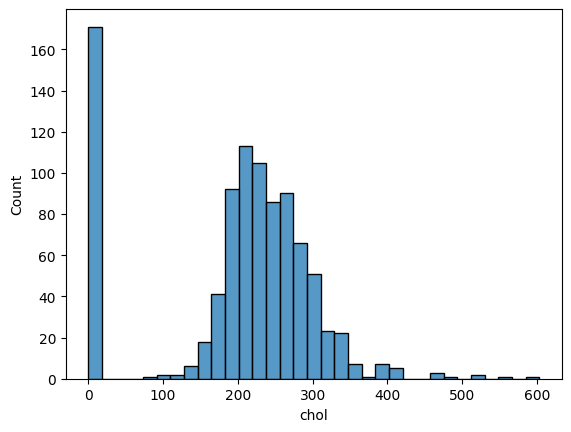

862
917


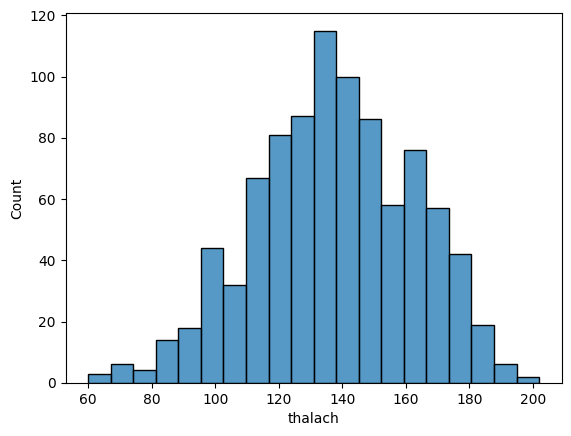

855
917


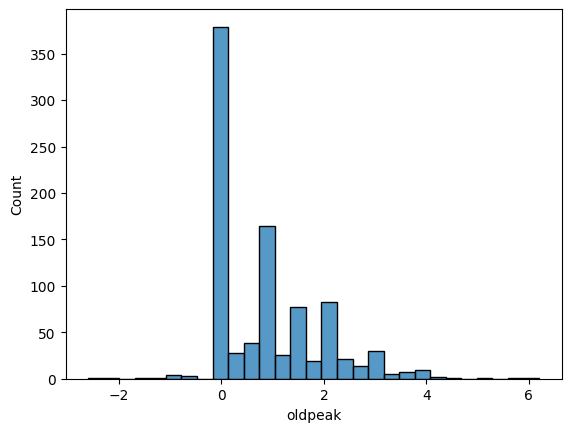

In [14]:
for column in mean:
    print(df[column].count())
    df[column] = fill_na_with_mean(df[column])
    print(df[column].count())
    sns.histplot(df[column])
    plt.show()

917
917


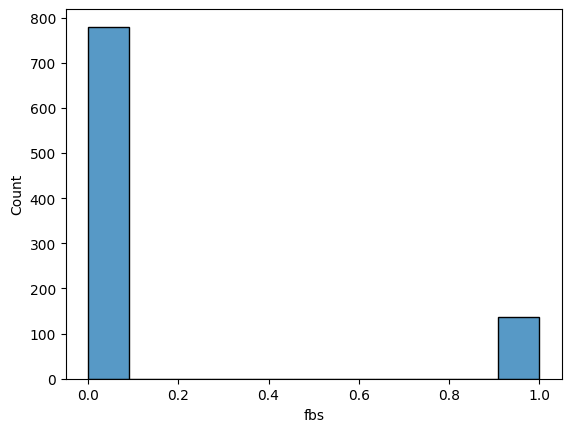

862
917


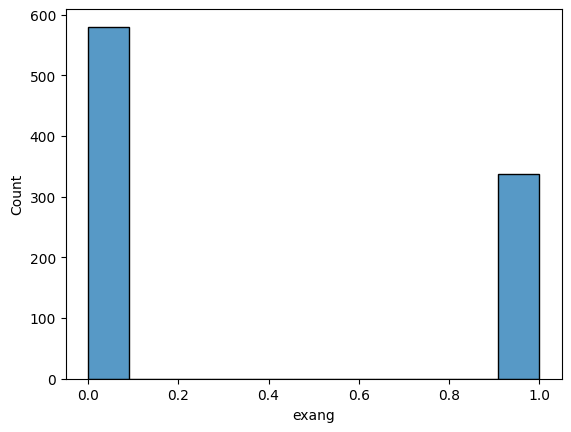

609
917


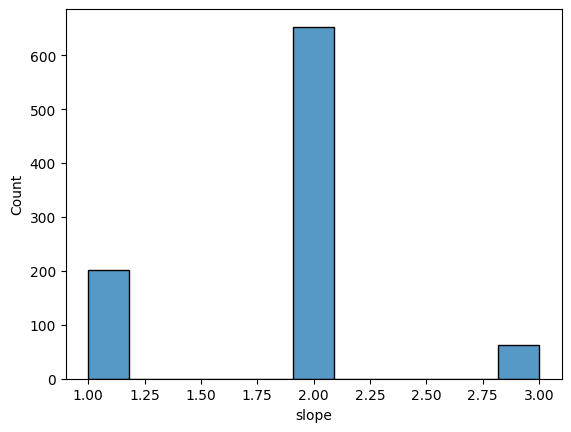

308
917


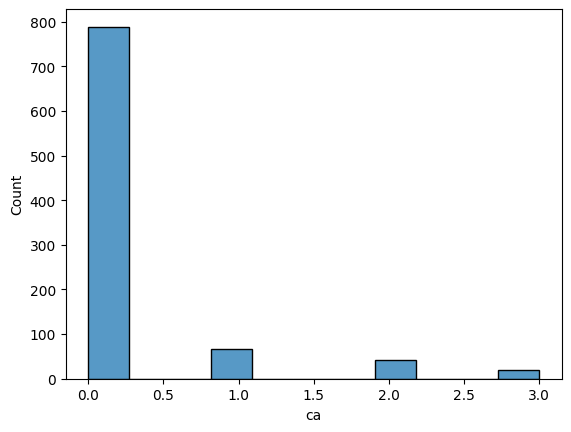

433
917


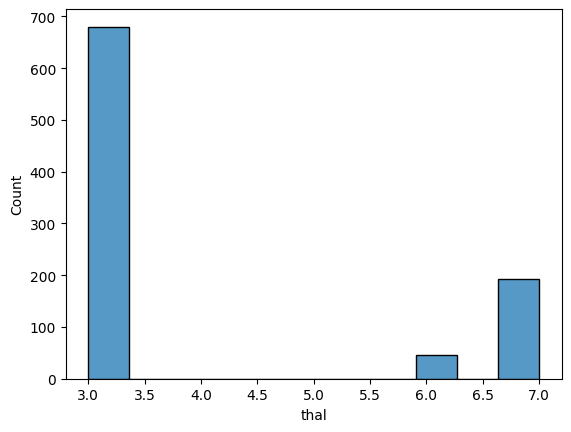

In [15]:
for column in mode:
    print(df[column].count())
    df[column] = fill_na_with_mode(df[column])
    print(df[column].count())
    sns.histplot(df[column])
    plt.show()

In [16]:
df.dtypes

hospital      int64
age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [17]:
X = df.drop('num',axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.shape

(614, 14)

# ***2. ML Model 1***
### ***Model Chosen: K Nearest Neighbours***
_Accuracy Achieved: 81%_

<h2>2.0. Feature Scaling</h2>

In [18]:
#Feature Scaling
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Scaler not fitted. Call fit() before transforming.")
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>2.1. Using Euclidean Distance</h2>

In [20]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.classified_points = {}

    def classify(self, training_points, class_labels):
        self.classified_points = {0: [], 1: []}
        for training_point, class_label in zip(training_points, class_labels):
            self.classified_points[class_label].append(np.array(training_point))

    def knn(self, test_point):
        distances = []
        for class_label, training_points in self.classified_points.items():
            training_points = np.array(training_points)
            squared_diff = (training_points - np.array(test_point))**2
            euclidean_distances = np.sqrt(np.sum(squared_diff, axis=1))
            distances.extend(zip(euclidean_distances, [class_label]*len(training_points)))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]
        return neighbors

    def predict(self, X_test):
        predicted_classes = []
        for test_point in X_test:
            neighbors = self.knn(test_point)
            predicted_class = sum(class_label for _, class_label in neighbors)
            predicted_classes.append(1 if predicted_class > 0 else 0)
        return np.array(predicted_classes)

In [44]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.classify(X_train_scaled, y_train)
predictions = knn_classifier.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       134
           1       0.77      0.93      0.84       169

    accuracy                           0.81       303
   macro avg       0.83      0.79      0.80       303
weighted avg       0.82      0.81      0.80       303



<h2>2.2. Using Manhattan Distance</h2>

In [22]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.classified_points = {}

    def classify(self, training_points, class_labels):
        self.classified_points = {0: [], 1: []}
        for training_point, class_label in zip(training_points, class_labels):
            self.classified_points[class_label].append(np.array(training_point))

    def knn(self, test_point):
        distances = []
        for class_label, training_points in self.classified_points.items():
            training_points = np.array(training_points)
            abs_diff = np.abs(training_points - np.array(test_point))
            manhattan_distances = np.sum(abs_diff, axis=1)
            distances.extend(zip(manhattan_distances, [class_label]*len(training_points)))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]
        return neighbors

    def predict(self, X_test):
        predicted_classes = []
        for test_point in X_test:
            neighbors = self.knn(test_point)
            predicted_class = sum(class_label for _, class_label in neighbors)
            predicted_classes.append(1 if predicted_class > 0 else 0)
        return np.array(predicted_classes)


In [45]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.classify(X_train_scaled, y_train)
predictions = knn_classifier.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       134
           1       0.77      0.93      0.84       169

    accuracy                           0.81       303
   macro avg       0.83      0.79      0.80       303
weighted avg       0.82      0.81      0.80       303



# ***3. ML Model 2***
### ***Model Chosen: Random Forest***
_Accuracy Achieved: 82%_

In [24]:
# class for the node of the decision tree
class Node:
    def __init__(self, feature=None, impurity=None, thresh=None, left_node=None, right_node=None, value=None, isLeaf=False):
        #feature based on which the node splits the data
        self.feature = feature

        # gini impurity of the node
        self.impurity = impurity

        # threshold of self.value to decide splits
        self.thresh = thresh

        self.left_node = left_node
        self.right_node = right_node

        # value or final label predicted if the node is a leaf node
        self.value = value

        # whether node is a leaf
        self.isLeaf = isLeaf

# class for decision tree
class DecisionTree:
    def __init__(self, max_depth=3, min_rows_split=3):
        # minimum number of rows required for the data to be split
        self.min_rows_split = min_rows_split

        # maximum depth of the tree
        self.max_depth = max_depth

        # root node of the tree
        self.root = None
    
    def fit(self, X, y):
        '''
        fits the tree with given training data
        '''
        df = pd.concat([X, y], axis = 1)
        self.root = self.make_tree(0, df)
    
    def make_tree(self, depth, df):
        '''
        recursively builds the decision tree
        '''
        rows = len(df.iloc[:,:-1])
        features = list(df.iloc[:,:-1].columns)

        # condition to split the current node
        if self.max_depth > depth and rows > self.min_rows_split:
            best_split = self.optimal_feature(df)

            # if the node is still impure, it is split
            if best_split['gini'] > 0:
                l_tree = self.make_tree(depth+1, best_split['left_split'])
                r_tree = self.make_tree(depth+1, best_split['right_split'])
                return Node(best_split['feat'], best_split['gini'], best_split['thresh'], l_tree, r_tree)
        print('df:\n', df,'\n')

        # final label the node predicts, i.e if it is a leaf
        final_value = self.final_label(df.iloc[:,-1])
        return Node(value=final_value, isLeaf=True)

    def optimal_feature(self, df):
        '''
        finds the optimal split (with minimum gini impurity)
        '''
        X = df.iloc[:,:-1]
        y = df.iloc[:,-1]
        features = list(X.columns)
        min_gini = float("inf")

        # iterating through features
        for feature in features:
            values = df[feature].unique()

            # iterating through all possible thresholds
            for val in values:
                l_condition = df[feature] <= val
                r_condition = df[feature] > val
                l_df = df[l_condition]
                r_df = df[r_condition]

                # finds weighted impurity of current node based on possible child nodes
                gini = self.weighted_gini_impurity(l_df, r_df)

                # if it is lower than current gini impurity, update the best split values
                if gini < min_gini:
                    min_gini = gini
                    result = {
                        'feat': feature,
                        'thresh': val,
                        'left_split': l_df,
                        'right_split': r_df,
                        'gini': gini
                    }
        return result

    def weighted_gini_impurity(self, l, r):
        ''' 
        finds weighted impurity of current node based on possible child nodes
        '''
        weight_r = len(r)/(len(l)+len(r))
        weight_l = 1 - weight_r
        return (weight_r*(self.gini_impurity(r)) + weight_l*(self.gini_impurity(l)))

    def gini_impurity(self, subset):
        ''' 
        calculates gini impurity based on formula (1 - summation((probability of labels) ^ 2))
        '''
        target  = subset.iloc[:,-1]
        sub_label_distr = dict(target.value_counts())
        total = len(target)
        sum_squares = 0
        for label in sub_label_distr.keys():
            sum_squares += (sub_label_distr[label]/total)**2
        impurity = 1 - sum_squares
        return impurity
    
    def final_label(self, col):
        ''' 
        finds final label which leaf node predicts
        '''
        return (dict(map(reversed, dict(col.value_counts()).items()))[max(dict(col.value_counts()).values())])

    def predict_sub(self, input, tree):
        ''' 
        predicts label for a single test sample
        '''
        #if leaf node, return value contained
        if tree.isLeaf:
            return tree.value

        # if not a leaf node, traverses down the tree based on thresholds and features (recursively)
        else:
            limit = tree.thresh
            feat = tree.feature
            if input[feat]<=limit:
                return self.predict_sub(input, tree.left_node)
            else:
                return self.predict_sub(input, tree.right_node)
    
    def predict(self, inputs):
        ''' 
        predicts values for a set of test data
        '''
        preds = []
        for i in range(len(inputs)):
            preds.append(self.predict_sub(inputs.iloc[i], self.root))
        return preds


In [25]:
# class for decision tree
class DecisionTree:
    def __init__(self, max_depth=3, min_rows_split=3):
        # minimum number of rows required for the data to be split
        self.min_rows_split = min_rows_split

        # maximum depth of the tree
        self.max_depth = max_depth

        # root node of the tree
        self.root = None
    
    def fit(self, X, y):
        '''
        fits the tree with given training data
        '''
        df = pd.concat([X, y], axis = 1)
        self.root = self.make_tree(0, df)
    
    def make_tree(self, depth, df):
        '''
        recursively builds the decision tree
        '''
        rows = len(df.iloc[:,:-1])
        features = list(df.iloc[:,:-1].columns)

        # condition to split the current node
        if self.max_depth > depth and rows > self.min_rows_split:
            best_split = self.optimal_feature(df)

            # if the node is still impure, it is split
            if best_split['gini'] > 0:
                l_tree = self.make_tree(depth+1, best_split['left_split'])
                r_tree = self.make_tree(depth+1, best_split['right_split'])
                return Node(best_split['feat'], best_split['gini'], best_split['thresh'], l_tree, r_tree)

        # final label the node predicts, i.e if it is a leaf
        final_value = self.final_label(df.iloc[:,-1])
        return Node(value=final_value, isLeaf=True)

    def optimal_feature(self, df):
        '''
        finds the optimal split (with minimum gini impurity)
        '''
        X = df.iloc[:,:-1]
        y = df.iloc[:,-1]
        features = list(X.columns)
        min_gini = float("inf")

        # iterating through features
        for feature in features:
            values = df[feature].unique()

            # iterating through all possible thresholds
            for val in values:
                l_condition = df[feature] <= val
                r_condition = df[feature] > val
                l_df = df[l_condition]
                r_df = df[r_condition]

                # finds weighted impurity of current node based on possible child nodes
                gini = self.weighted_gini_impurity(l_df, r_df)

                # if it is lower than current gini impurity, update the best split values
                if gini < min_gini:
                    min_gini = gini
                    result = {
                        'feat': feature,
                        'thresh': val,
                        'left_split': l_df,
                        'right_split': r_df,
                        'gini': gini
                    }
        return result

    def weighted_gini_impurity(self, l, r):
        ''' 
        finds weighted impurity of current node based on possible child nodes
        '''
        weight_r = len(r)/(len(l)+len(r))
        weight_l = 1 - weight_r
        return (weight_r*(self.gini_impurity(r)) + weight_l*(self.gini_impurity(l)))

    def gini_impurity(self, subset):
        ''' 
        calculates gini impurity based on formula (1 - summation((probability of labels) ^ 2))
        '''
        target  = subset.iloc[:,-1]
        sub_label_distr = dict(target.value_counts())
        total = len(target)
        sum_squares = 0
        for label in sub_label_distr.keys():
            sum_squares += (sub_label_distr[label]/total)**2
        impurity = 1 - sum_squares
        return impurity
    
    def final_label(self, col):
        ''' 
        finds final label which leaf node predicts
        '''
        return (dict(map(reversed, dict(col.value_counts()).items()))[max(dict(col.value_counts()).values())])

    def predict_sub(self, input, tree):
        ''' 
        predicts label for a single test sample
        '''
        #if leaf node, return value contained
        if tree.isLeaf:
            return tree.value

        # if not a leaf node, traverses down the tree based on thresholds and features (recursively)
        else:
            limit = tree.thresh
            feat = tree.feature
            if input[feat]<=limit:
                return self.predict_sub(input, tree.left_node)
            else:
                return self.predict_sub(input, tree.right_node)
    
    def predict(self, inputs):
        ''' 
        predicts values for a set of test data
        '''
        preds = []
        for i in range(len(inputs)):
            preds.append(self.predict_sub(inputs.iloc[i], self.root))
        return preds

In [26]:
# class for random forest classifier
class RandomForest:
    def __init__(self, n_estimators):

        # number of decision trees in the forest
        self.n_estimators = n_estimators

        # array of decision trees
        self.forest = None

        # set of possible labels
        self.prediction_labels = None

    def create_forest(self, df):
        '''
        creates multiple trees for each bootstrapped dataset
        '''
        datasets = self.get_all_bootstraps(df)
        trees = []
        for dataset in datasets:
            tree = DecisionTree()
            tree.fit(dataset.iloc[:,:-1], dataset.iloc[:, -1])
            trees.append(tree)
        return trees

    def fit(self, X, y):
        ''' 
        fits the forest with given training data
        '''
        df = pd.concat([X, y], axis = 1)
        self.prediction_labels = list(y.unique())
        self.forest = self.create_forest(df)

    def bootstrap_dataset(self, df):
        ''' 
        creates a bootstrapped dataset from given training data
        '''
        boot_indices = []
        for i in range(len(df)):
            boot_indices.append(random.randint(0, len(df) - 1))
        boot_df = pd.DataFrame()
        for index in boot_indices:
            boot_df = pd.concat([boot_df, df.iloc[index]], axis = 1)  
        boot_df = boot_df.transpose()
        return boot_df

    def predict_matrix(self, inputs):
        ''' 
        creates a matrix of all the predictions by each tree in the forest
        '''
        predictions_df = pd.DataFrame()
        for tree in self.forest:
            preds_by_tree = tree.predict(inputs)
            predictions_df = pd.concat([predictions_df, pd.Series(preds_by_tree)], axis = 1)
        return predictions_df.transpose()

    def predict(self, inputs):
        ''' 
        predicts for a set of data
        '''
        matrix = self.predict_matrix(inputs)
        final_preds = []
        for tree in matrix.columns:
            final_preds.append(self.max_dict(dict((matrix[tree].value_counts()))))
        return final_preds

    def max_dict(self, d):
        ''' 
        gives key containing maximum value of a dictionary
        '''
        rev = dict(map(reversed, d.items()))
        return rev[max(list(d.values()))]

    def get_all_bootstraps(self, df):
        ''' 
        gets self.n_estimators number of bootstrapped datasets for each tree to train on
        '''
        bootstraps = []
        features = list(df.iloc[:,:-1].columns)
        for i in range(self.n_estimators):
            bootstraps.append({
                'df': self.bootstrap_dataset(df),
                'features': list(np.random.choice(features, size = int(np.ceil(np.sqrt(len(features)))), replace=False))+[df.columns[-1]]
            })
        bootstrapped_datasets = []
        for bootstrap in bootstraps:
            data_frame = bootstrap['df']
            feats = bootstrap['features']
            bootstrapped_datasets.append(data_frame[feats])
        return bootstrapped_datasets

In [27]:
forest1 = RandomForest(n_estimators=100)
X_train_series = pd.DataFrame(X_train, columns = df.columns[:-1])
y_train_series = pd.Series(y_train)
X_test_series = pd.DataFrame(X_test, columns = df.columns[:-1])
y_test_series = pd.Series(y_test)
forest1.fit(X_train_series, y_train_series)
random_forest_preds = forest1.predict(X_test_series)
print(classification_report(y_test, random_forest_preds))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       134
           1       0.84      0.85      0.84       169

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



# ***4. ML Model 3***
### ***Model Chosen: Artificial Neural Network***
_Accuracy Achieved: %_

# ***5. ML Model 4 (Based on research literature)***
### ***Model Chosen: XGBoost***
_Accuracy Achieved: 82%_

In [28]:
class XGBoost:
    
    def __init__(self, num_trees, tree_height, ip, op, lr, gamma, lda):
        '''
         num_trees: number of trees that will be used to predict the outcome
         tree_height: height of each tree built
         ip: input to the model
         op: output to the model
         lr: learning rate of each tree
         gamma: threshhold value for pruning of trees
         lda: ragularisation parameter for the trees
        '''
        self.num_trees = num_trees
        self.tree_height = tree_height
        self.ip = ip
        self.op = op
        self.lr = lr
        self.gamma = gamma
        self.odds = 0.5
        self.trees = []
        self.prev_preds = np.ones(ip.shape[0])*0.5
        self.lda = lda
        self.build_trees()
    
    def build_trees(self):
        '''
        function to build 'num_trees' decision trees 
        '''
        for i in range(self.num_trees):
            self.trees.append(Tree(self.ip,self.op,self.prev_preds, self.tree_height, self.lda, self.gamma, self.lr))
            self.prev_preds = self.trees[i].give_preds(self.prev_preds)

    def sigmoid(self,ip):
        '''
        ip: value whose logistic sigmoid needs to be computed
        '''
        return math.exp(ip)/(math.exp(ip)+1)
            
    def predict(self,ip):
        '''
        function to predict the most likely label for the given input
        '''
        op = []
        for x in ip:
            odds = 0
            for i in self.trees:
                odds+=(self.lr*i.traverse(x))
            if self.sigmoid(odds)>=0.5:
                op.append(1)
            else:
                op.append(0)
        return np.array(op)

In [29]:
class Tree:
    
    def __init__(self, ip, op, prev_pred, tree_height, lda, gamma, lr):
        '''
        ip: input data
        op: output data
        prev_pred: the predictions from the previous tree
        tree_height: height of the current tree
        lda: regularisation parameter for the current tree
        gamma: threshhold value for pruning of trees 
        lr: learning rate of each tree
        '''
        self.ip = np.array(ip)
        self.op = np.array(op)
        self.prev_pred = np.array(prev_pred)
        self.tree_height = tree_height
        self.residual = self.op-self.prev_pred
        self.lda = lda
        self.gamma = gamma
        self.lr = lr
        self.head = self.make_tree(ip,self.residual,self.prev_pred,tree_height, 0, self.lda, 1)
        self.head = self.prune_tree(self.head, self.gamma)
        if self.head == None:
            print("F")
            self.preds = self.prev_pred
        else:
            self.preds = self.give_preds(self.prev_pred)
    
    def make_tree(self, ip, residual, prev_pred, tree_height, depth, lda, tree_num):
        '''
        function to make a decision tree of height 'tree_height' from the given input taking into account the corresponding residuals and predictions of the previous decision tree
        '''
        if depth > tree_height:
            return None
        else:
            tree_num +=1
            head = Node(ip, residual, prev_pred, self.lda)
            left = len(head.res_left)
            head.left = self.make_tree(ip[:left], head.res_left, prev_pred, tree_height, depth+1, self.lda, tree_num)
            tree_num+=1
            head.right = self.make_tree(ip[left:], head.res_right, prev_pred, tree_height, depth+1, self.lda, tree_num)
        return head
    
    def traverse(self, ip):
        '''
        function to traverse the decision tree according to the given input
        '''
        head_copy = self.head
        condition = 0
        while (head_copy.left != None) and (head_copy.right != None):
            column = head_copy.column
            if ip[column]<head_copy.test:
                head_copy = head_copy.left
            else:
                head_copy = head_copy.right
        return head_copy.out_value
        
    def sigmoid(self,ip):
        '''
        ip: value whose logistic sigmoid needs to be computed
        '''
        return math.exp(ip)/(math.exp(ip)+1)
    
    def give_preds(self, prev_preds):
        '''
        function to return the prediction of the current decision tree
        '''
        odds = []
        for i in range(len(prev_preds)):
            odds.append(math.log((prev_preds[i]/(1-prev_preds[i]))))
            odds[i]+=self.lr*self.traverse(self.ip[i])
            odds[i] = self.sigmoid(odds[i])
        return np.array(odds)
    
    def prune_tree(self,head,gamma):
        '''
        function to prune the current decision tree according to the threshhold value gamma
        '''
        if head == None:
            return None
        else:
            head.left = self.prune_tree(head.left,gamma)
            head.right = self.prune_tree(head.right,gamma)
            if head.out_value<gamma:
                return None
            else:
                return head

In [30]:
class Node:
    
    def __init__(self, ip, residual, prev_pred, lda):
        '''
        ip: input data
        residual: the residuals corresponding to the inputs
        prev_pred: the predictions from the previous tree
        lda: regularisation parameter for the current tree
        '''
        self.ip = ip
        self.residual = residual
        self.res_set = set(self.residual)
        self.prev_pred = prev_pred
        self.lda = lda
        self.res_left = []
        self.res_right = []
        self.column = 0
        self.test = 0
        self.gain = 0
        self.cover = []
        for p in prev_pred:
            self.cover.append(p*(1-p))
        self.cover = np.array(self.cover)
        self.out_value = self.find_out_value()
        self.similarity = self.find_similarity(residual,self.cover)
        self.find_best_division()
        
    def find_out_value(self):
        '''
        function to find out the out value of the current node
        '''
        return (np.array(self.residual).sum()/(self.cover.sum()+self.lda))
    
    def  find_similarity(self,residual,cover):
        '''
        function to find out the similarity value of the current node
        '''
        return ((np.array(residual).sum()**2)/(cover.sum()+self.lda))
    
    def find_best_division(self):
        '''
        function to find out the best split for the current node
        '''
        cur_gain = 0
        for column in range(self.ip.shape[1]):
            values = []
            for j in range(self.ip.shape[0]):
                values.append(self.ip[j][column])
            unique_values = set(values)
            unique_values = list(unique_values)
            uniquq_values = unique_values.sort()
            right = len(unique_values)-1
            while right>=1:
                target = (unique_values[right]+unique_values[right-1])/2
                llist = []
                rlist = []
                for i in range(len(values)):
                    if values[i] < target:
                        llist.append(self.residual[i])
                        
                for i in range(len(values)):
                    if values[i] >= target:
                        rlist.append(self.residual[i])
                gain = self.find_similarity(llist,self.cover[:right])+self.find_similarity(rlist,self.cover[right:])-self.similarity
                if (column == 0) and (right == len(unique_values)-1):
                    cur_gain = gain
                    self.test = target
                    self.res_left = llist
                    self.res_right = rlist
                    self.gain = gain
                else:             
                    if gain>cur_gain:
                        cur_gain = gain
                        self.test = target
                        self.column = column
                        self.res_left = llist
                        self.res_right = rlist
                        self.gain = gain
                right-=1

In [31]:
xg_boost = XGBoost(250, 6, X_train, y_train, 0.1, -0.5, 2)

In [33]:
test = xg_boost.predict(X_train)
print("Train")
print(classification_report(y_train, test))
test = xg_boost.predict(X_test)
print("Test")
print(classification_report(y_test, test))

Train
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       276
           1       0.80      0.83      0.81       338

    accuracy                           0.79       614
   macro avg       0.79      0.79      0.79       614
weighted avg       0.79      0.79      0.79       614

Test
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       134
           1       0.85      0.82      0.83       169

    accuracy                           0.82       303
   macro avg       0.81      0.82      0.81       303
weighted avg       0.82      0.82      0.82       303



# ***6. Comparison of insights drawn from the models***

***1. K-NN***  
&emsp;&nbsp;**Our accuracy:** _81%_  
&emsp;&nbsp;**Sci-kit learn accuracy:** _82%_  
&emsp;&nbsp;**k-value (no. of neighbours):** _3_

&emsp;&nbsp;**Performance of the classifier is similar for both Euclidean and Manhattan distances. This implies that the dataset is not strongly influenced by the choice of distance metric.**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
print("Euclidean")
print(classification_report(y_test, y_pred))

Euclidean
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       134
           1       0.84      0.83      0.84       169

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
print("Manhattan")
print(classification_report(y_test, y_pred))

Manhattan
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       134
           1       0.85      0.82      0.84       169

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



***2. Random Forest***  
&emsp;&nbsp;**Our accuracy:** _83%_  
&emsp;&nbsp;**Sci-kit learn accuracy:** _83%_  
&emsp;&nbsp;**Used 100 estimators.**  
&emsp;&nbsp;**Gini impurity was used as a measure to find the purity of each node in the tree.**  
&emsp;&nbsp;**Tree depth was set to 3.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       134
           1       0.86      0.85      0.86       169

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303



***4. XGBoost***  
&emsp;&nbsp;**Our accuracy:** _82%_  
&emsp;&nbsp;**Sci-kit learn accuracy:** _81%_  
&emsp;&nbsp;**The model consists of _250_ decision trees as predictors. Each tree is of height _6_, learning rate _0.1_, regularisation parameter lambda _2_.**  
&emsp;&nbsp;**After creation of a decision tree, post pruning is carried out based on the out values of each node.**  
&emsp;&nbsp;**If a node has out value less than the specified threshold gamma the subtree rooted at that node is removed.**  
&emsp;&nbsp;**Since the training and test accuracy is similar for the model it implies that there was no overfitting.**

In [ ]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(max_depth=6)
clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       134
           1       0.85      0.80      0.83       169

    accuracy                           0.81       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.82      0.81      0.81       303



### Conclusion ###
- ***We observe that all of the models have a lower precision for class '0'. This is due to the uneven distribution of 0s and 1s in the dataset.***    
- ***Since we were able to get satisfactory accuracies, it indicates that the imputation of missing values was a good estimate of what might have been the actual value.***
- ***We used two ensemble strategies: Bagging(Random Forest) and Boosting(XGBoost) and observed that both the strategies proved to be effective and had similar results as seen by the predictions.***

# **_7. References_**

1.   [Reference for handling missing values](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)
2.   [Reference for making markdown cells](https://www.markdownguide.org/basic-syntax/)
3.   [Reference for KNN](https://www.geeksforgeeks.org/k-nearest-neighbours/)
4.   [Reference for XGBoost](https://www.youtube.com/watch?v=8b1JEDvenQU&ab_channel=StatQuestwithJoshStarmer)
